# Phase 3 Project 


## 1. Project Setup
- Import necessary libraries (pandas, numpy, sklearn, matplotlib, seaborn)
- Load the dataset
- Set random seed for reproducibility

## 2. Data Exploration and Preprocessing
- Examine the dataset (head, info, describe)
- Check for missing values and handle them
- Explore data distributions and correlations
- Perform feature engineering if necessary
- Split the data into features (X) and target variable(s) (y)

## 3. Logistic Regression
- Prepare the data (ensure binary target variable)
- Create and train the model
- Make predictions on the test set
- Evaluate the model (accuracy, precision, recall, F1-score)
- Plot the ROC curve and calculate AUC
- Analyze coefficients and their significance

## 4. Conclusion and Future Work
- Summarize key findings
- Discuss limitations of the current approach
- Suggest potential improvements or additional models to try

## Student details
Nduku Kitenge
DSC-PT07 


## Business Problem

The goal of this project is to predict which pumps are functional, which need some repairs and which dont work at all. 

The challenge from DrivenData. (2015). Pump it Up: Data Mining the Water Table. Retrieved [Month Day Year] from https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table  with data from Taarifa and the Tanzanian Ministry of Water. The goal of this project is to predict one of these three classes based on a number of variables about what kind of pump is operating, when it was installed, and how it is managed. A smart understanding of which waterpoints will fail can improve maintenance operations and ensure that clean, potable water is available to communities across Tanzania.



## 1. Project Setup
- Import necessary libraries (pandas, numpy, sklearn, matplotlib, seaborn)
- Load the dataset

In [32]:
#import neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
#Load training dataset
sub_df = pd.read_csv('./SubmissionFormat.csv',index_col=0)
training_df = pd.read_csv('./TrainingSetValues.csv',index_col=0)
test_df = pd.read_csv('./TestSetValues.csv',index_col=0)
t_label_df = pd.read_csv('TrainingSetLabels.csv',index_col=0)




## 2. Data Exploration and Preprocessing
- Examine the dataset (head, info, describe)
- Check for missing values and handle them
- Explore data distributions and correlations
- Perform feature engineering eg. add pump age
- Split the data into features (X) and target variable(s) (y)

In [3]:
# Function to display dataset info
def display_dataset_info(df, name):
    print(f"\n=== {name} ===")
    print(f"Shape: {df.shape}")
    print("\nInfo:")
    print(df.info())
    print("\nDescription:")
    print(df.describe())
    print("\nHead:")
    print(df.head())
    print("\n" + "="*40)

# Display info for each dataset
display_dataset_info(sub_df, "Submission Format")
display_dataset_info(training_df, "Training Set Values")
display_dataset_info(test_df, "Test Set Values")
display_dataset_info(t_label_df, "Training Set Labels")


=== Submission Format ===
Shape: (14850, 1)

Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 14850 entries, 50785 to 68707
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   status_group  14850 non-null  object
dtypes: object(1)
memory usage: 232.0+ KB
None

Description:
           status_group
count             14850
unique                1
top     predicted label
freq              14850

Head:
          status_group
id                    
50785  predicted label
51630  predicted label
17168  predicted label
45559  predicted label
49871  predicted label


=== Training Set Values ===
Shape: (59400, 39)

Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 69572 to 26348
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   date_recorded          59400 no

In [4]:
#check for missing values in training dataset
training_df.isna().sum()



amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity

## Dropping columns and reasons why:
- Scheme name - Too many null values 
- wpt_name - Too many unique values
- management - management group covers this
- quality group - quality covers this
- quantity group
- extracton type group 

Numerical columns:
- num private - dont know what this means. 

Observations
- Funder and installer are similar, but funder has less null values than installer. 
- Waterpoint type and water point are similar - Will drop waterpoint type. 



In [5]:
#Check categorical columns
training_df.select_dtypes(include=['object']).columns

Index(['date_recorded', 'funder', 'installer', 'wpt_name', 'basin',
       'subvillage', 'region', 'lga', 'ward', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')

In [6]:
#check numerical columns
training_df.select_dtypes(include=['int64', 'float64']).columns

Index(['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private',
       'region_code', 'district_code', 'population', 'construction_year'],
      dtype='object')

In [7]:
#Define the list of columns to drop
columns_drop = ['wpt_name','lga','ward','quality_group','extraction_type_class','management','source','waterpoint_type_group','num_private']

# Drop unnecessary columns
training_df = training_df.drop(columns_drop,axis=1)

#Print remaining columns
print(training_df.columns)

Index(['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer',
       'longitude', 'latitude', 'basin', 'subvillage', 'region', 'region_code',
       'district_code', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'management_group',
       'payment', 'payment_type', 'water_quality', 'quantity',
       'quantity_group', 'source_type', 'source_class', 'waterpoint_type'],
      dtype='object')


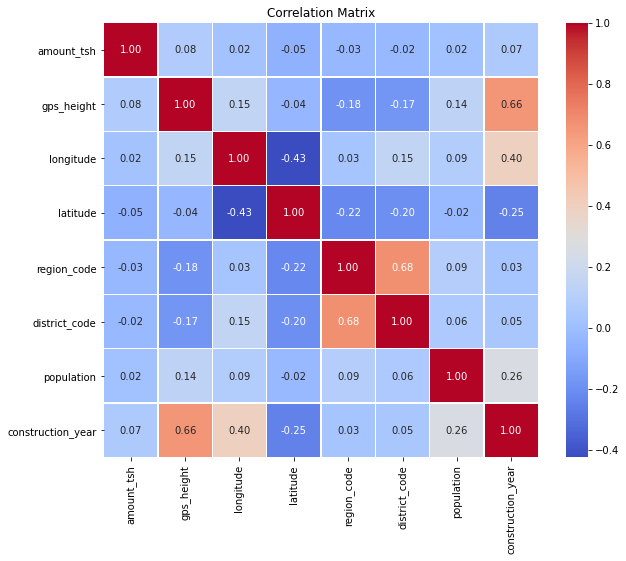

In [8]:
#explore data distrubitions and correlations of the numerical- training data
corr_matrix = training_df.corr()

# Plot the correlation matrix using Seaborn for numerical values.
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [9]:
# merge with training labels data using ID as connector
merged_df = pd.merge(training_df, t_label_df, on='id', how='outer', indicator=True)
print(merged_df.head(20))

       amount_tsh date_recorded                   funder  gps_height  \
id                                                                     
69572      6000.0    2011-03-14                    Roman        1390   
8776          0.0    2013-03-06                  Grumeti        1399   
34310        25.0    2013-02-25             Lottery Club         686   
67743         0.0    2013-01-28                   Unicef         263   
19728         0.0    2011-07-13              Action In A           0   
9944         20.0    2011-03-13      Mkinga Distric Coun           0   
19816         0.0    2012-10-01                     Dwsp           0   
54551         0.0    2012-10-09                    Rwssp           0   
53934         0.0    2012-11-03                 Wateraid           0   
46144         0.0    2011-08-03              Isingiro Ho           0   
49056         0.0    2011-02-20                  Private          62   
50409       200.0    2013-02-18                   Danida        

In [10]:
#check for missing values in merged dataset
merged_df.isna().sum()

amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quantity                     0
quantity_group               0
source_type                  0
source_class                 0
waterpoint_type              0
status_group                 0
_merge                       0
dtype: i

In [11]:
#Treat null values
missing_value_columns = ['funder', 'installer', 'subvillage', 'public_meeting','scheme_name', 'scheme_management', 'permit']

# Check the value counts
for col in missing_value_columns:
    print(merged_df[col].value_counts())

Government Of Tanzania            9084
Danida                            3114
Hesawa                            2202
Rwssp                             1374
World Bank                        1349
                                  ... 
Tanzania Egypt Technical Co Op       1
Resolute Mininggolden Pride          1
Mbozi Hospital                       1
Isf / Tasaff                         1
Dv                                   1
Name: funder, Length: 1897, dtype: int64
DWE              17402
Government        1825
RWE               1206
Commu             1060
DANIDA            1050
                 ...  
Safari Roya          1
REGWA                1
Mwakabalula          1
Mamaz                1
Prof. Saluati        1
Name: installer, Length: 2145, dtype: int64
Madukani       508
Shuleni        506
Majengo        502
Kati           373
Mtakuja        262
              ... 
Shigangama       1
Mpimba           1
Nyakichacha      1
Ilyema           1
Itembe           1
Name: subvillage, Length

In [12]:
# Remove rows with missing values in 'funder', 'installer' and 'scheme_management' columns
merged_df.dropna(subset=['funder','installer', 'scheme_management'], axis=0, inplace=True)

Replacing the missing values for public meeting and permit with False. Assuming that the information doesnt exist. 

In [13]:
# Fill missing values in public meeting and permit'
for col in ['public_meeting', 'permit']:
    merged_df[col] = merged_df[col].fillna(False)

#Fill in missing values in 'scheme_name', subvillage
for col2 in ['scheme_name', 'subvillage']:
    merged_df[col2] = merged_df[col2].fillna('None')




In [14]:
# Confirm there are no more missing values
merged_df.isna().sum()

amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
scheme_name              0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
management_group         0
payment                  0
payment_type             0
water_quality            0
quantity                 0
quantity_group           0
source_type              0
source_class             0
waterpoint_type          0
status_group             0
_merge                   0
dtype: int64

In [15]:
# Ensure the 'installation_year' is in numeric format (not datetime, just the year)
merged_df['construction_year'] = pd.to_numeric(training_df['construction_year'], errors='coerce')

# Calculate pump age
current_year = pd.Timestamp.now().year
merged_df['pump_age'] = current_year - merged_df['construction_year']

# Handle cases where installation_year might be missing or incorrect (e.g., 0 or negative values)
merged_df['pump_age'] = merged_df['pump_age'].apply(lambda x: x if x > 0 else None)

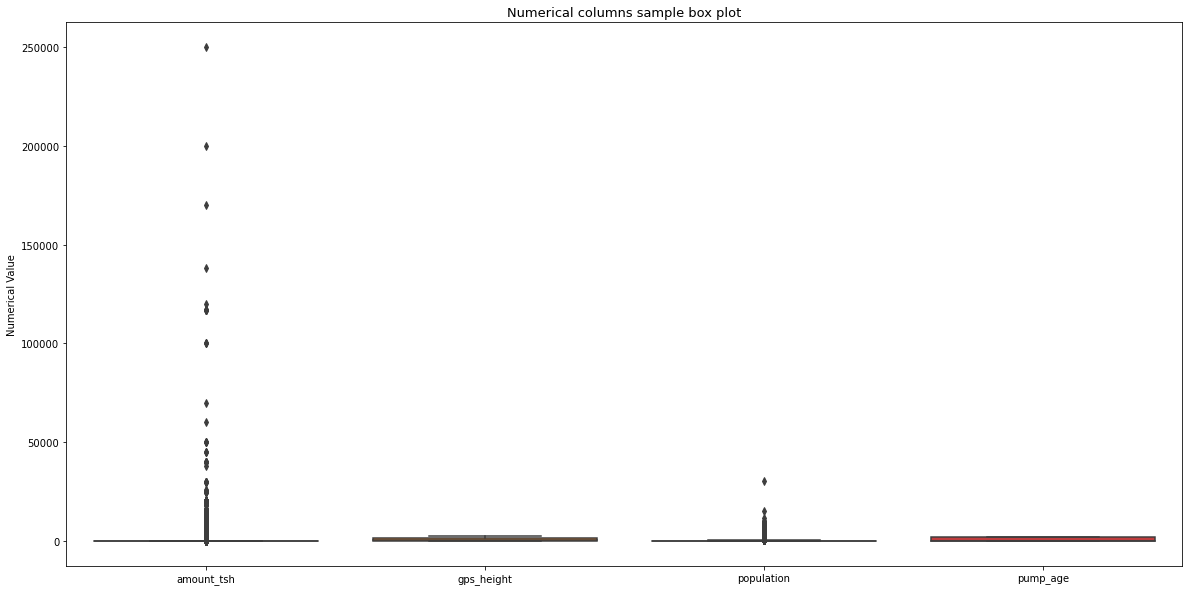

In [35]:
# Plotting box plots of some numerical columns
columns = ['amount_tsh', 'gps_height', 'population','pump_age']
plt.figure(figsize=(20, 10))
sns.boxplot(data=[merged_df[col] for col in columns])
plt.title("Numerical columns sample box plot", fontsize=13)
plt.ylabel("Numerical Value")
plt.xticks(range(0,4), columns)
plt.show()

In [17]:
# Check whether there are duplicates
merged_df.duplicated(keep = 'first').sum()


129

In [18]:
# Change the data type of public_meeting and permit columns to binary for classification
merged_df[['public_meeting', 'permit']] = merged_df[['public_meeting', 'permit']].astype(int)
# Check the new data types
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51880 entries, 69572 to 26348
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   amount_tsh             51880 non-null  float64 
 1   date_recorded          51880 non-null  object  
 2   funder                 51880 non-null  object  
 3   gps_height             51880 non-null  int64   
 4   installer              51880 non-null  object  
 5   longitude              51880 non-null  float64 
 6   latitude               51880 non-null  float64 
 7   basin                  51880 non-null  object  
 8   subvillage             51880 non-null  object  
 9   region                 51880 non-null  object  
 10  region_code            51880 non-null  int64   
 11  district_code          51880 non-null  int64   
 12  population             51880 non-null  int64   
 13  public_meeting         51880 non-null  int32   
 14  recorded_by            51880 non-n

## 3. Logistic Regression
- Prepare the data (ensure binary target variable)
- Create and train the model
- Make predictions on the test set
- Evaluate the model (accuracy, precision, recall, F1-score)
- Plot the ROC curve and calculate AUC
- Analyze coefficients and their significance

In [31]:
# Assign status_group column to y series
y = merged_df['status_group']

# Drop status_group and _merge to create X dataframe
X = merged_df.drop(['status_group','_merge'], axis=1)

# Print first 5 rows of X
X.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,basin,subvillage,region,...,management_group,payment,payment_type,water_quality,quantity,quantity_group,source_type,source_class,waterpoint_type,pump_age
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,Mnyusi B,Iringa,...,user-group,pay annually,annually,soft,enough,enough,spring,groundwater,communal standpipe,25
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Nyamara,Mara,...,user-group,never pay,never pay,soft,insufficient,insufficient,rainwater harvesting,surface,communal standpipe,14
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Pangani,Majengo,Manyara,...,user-group,pay per bucket,per bucket,soft,enough,enough,dam,surface,communal standpipe multiple,15
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mahakamani,Mtwara,...,user-group,never pay,never pay,soft,dry,dry,borehole,groundwater,communal standpipe multiple,38
9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Pangani,Moa/Mwereme,Tanga,...,user-group,pay per bucket,per bucket,salty,enough,enough,other,unknown,communal standpipe multiple,15


In [20]:
#Check categorical columns in merged set
merged_df.select_dtypes(include=['object']).columns

Index(['date_recorded', 'funder', 'installer', 'basin', 'subvillage', 'region',
       'recorded_by', 'scheme_management', 'scheme_name', 'extraction_type',
       'extraction_type_group', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quantity', 'quantity_group', 'source_type',
       'source_class', 'waterpoint_type', 'status_group'],
      dtype='object')

In [21]:
#check numerical columns in merged set
merged_df.select_dtypes(include=['int64', 'float64']).columns

Index(['amount_tsh', 'gps_height', 'longitude', 'latitude', 'region_code',
       'district_code', 'population', 'construction_year', 'pump_age'],
      dtype='object')

In [30]:
# Create lists of categorical, numerical, and binary columns
category_column = ['funder', 'installer', 'basin', 'region', 'scheme_management', 'scheme_name',
       'extraction_type_group', 'management_group', 'payment_type',
       'water_quality', 'quantity_group', 'source_type',
       'source_class', 'waterpoint_type']

numerical_column = ['amount_tsh', 'gps_height', 'longitude', 'latitude', 'region_code',
       'district_code', 'population', 'construction_year', 'pump_age']

binary_column = ['public_meeting', 'permit']

In [28]:
#create dummies for categorical colums
X= pd.get_dummies(X, columns=category_column)
X

,amount_tsh,gps_height,longitude,latitude,subvillage,region_code,district_code,population,public_meeting,recorded_by,...,source_class_groundwater,source_class_surface,source_class_unknown,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,1390,34.938093,-9.856322,Mnyusi B,11,5,109,1,GeoData Consultants Ltd,...,1,0,0,0,1,0,0,0,0,0
8776,0.0,1399,34.698766,-2.147466,Nyamara,20,2,280,0,GeoData Consultants Ltd,...,0,1,0,0,1,0,0,0,0,0
34310,25.0,686,37.460664,-3.821329,Majengo,21,4,250,1,GeoData Consultants Ltd,...,0,1,0,0,0,1,0,0,0,0
67743,0.0,263,38.486161,-11.155298,Mahakamani,90,63,58,1,GeoData Consultants Ltd,...,1,0,0,0,0,1,0,0,0,0
9944,20.0,0,39.172796,-4.765587,Moa/Mwereme,4,8,1,1,GeoData Consultants Ltd,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11164,500.0,351,37.634053,-6.124830,Komstari,5,6,89,1,GeoData Consultants Ltd,...,1,0,0,0,1,0,0,0,0,0
60739,10.0,1210,37.169807,-3.253847,Kiduruni,3,5,125,1,GeoData Consultants Ltd,...,1,0,0,0,1,0,0,0,0,0
27263,4700.0,1212,35.249991,-9.070629,Igumbilo,11,4,56,1,GeoData Consultants Ltd,...,0,1,0,0,1,0,0,0,0,0


In [34]:

# Split the data into training and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize the Decision Tree model
#dt = DecisionTreeClassifier(random_state=42)

# Train the model
#dt.fit(X_train, y_train)

# Predict on the test set
#y_pred = dt.predict(X_test)

# Evaluate the model
#print("Accuracy:", accuracy_score(y_test, y_pred))
#print("Classification Report:\n", classification_report(y_test, y_pred))
#print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

